In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1

## (a)

In [47]:
ff = pd.read_csv('data/F-F_Research_Data_Factors.csv')
avg_monthly_ff = ff['Mkt-RF'].mean() # unsure if this means relative returns or average rate of return
volatility_ff = ff['Mkt-RF'].std()
sharpe_ratio_ff = (ff['Mkt-RF']/volatility_ff).mean()
print("The average monthly return of the market is ")
print(avg_monthly_ff)
print("the volatility is")
print(volatility_ff)
print("The average monthly Sharpe Ratio is")
print(sharpe_ratio_ff)

The average monthly return of the market is 
0.670103448275862
the volatility is
5.352554226265551
The average monthly Sharpe Ratio is
0.12519321055872606


## (b) 

In [48]:
sdf = pd.read_csv('data/ps1_strategies.csv')
avg_monthly_sdf = sdf.CA.mean()
volatility_sdf = sdf.CA.std() # Not sure if this works for excess returns or if I need to subtract the risk free rate
sharpe_ratio_sdf = (sdf.CA/volatility_sdf).mean()
print("The average monthly return of the CA is")
print(avg_monthly_sdf)
print("the volatility is")
print(volatility_sdf)
print("The average monthly Sharpe Ratio is")
print(sharpe_ratio_sdf)

The average monthly return of the CA is
0.7339702298342213
the volatility is
2.629358554414979
The average monthly Sharpe Ratio is
0.2791442150793035


## (c)

In [49]:
def generate_capm(rpmrf, rm=ff['Mkt-RF']+ff.RF, rf=ff.RF):
    '''
    rp: excess return of the portfolio
    rm: excess return of the market
    rf: risk free rate
    '''
    beta = np.cov((rpmrf+rf), rm)[0, 1]/np.var(rm)
    alpha = np.mean(rpmrf) - beta*np.mean(rm - rf)
    return beta, alpha

def generate_cumulative_returns(df):
    return (((df/100)+1).cumprod() - 1)*100

## (d)

In [50]:
ff_trim = ff[ff['Month'] >= sdf['date'].min()]
ff_trim = ff_trim[ff_trim['Month'] <= sdf['date'].max()] 
ff_trim = ff_trim.reset_index(drop=True)


In [51]:
beta, alpha = generate_capm(sdf.CA.to_numpy(), (ff_trim['Mkt-RF'] + ff_trim['RF']).to_numpy(), ff_trim.RF.to_numpy())
print("The beta of the CA is")
print(beta)
print("The alpha of the CA is")
print(alpha)

The beta of the CA is
0.48846335461929835
The alpha of the CA is
0.39818550915625484


In [52]:
returns = ff_trim.RF + beta*ff_trim['Mkt-RF']

## (f)
does he want excess or total returns?

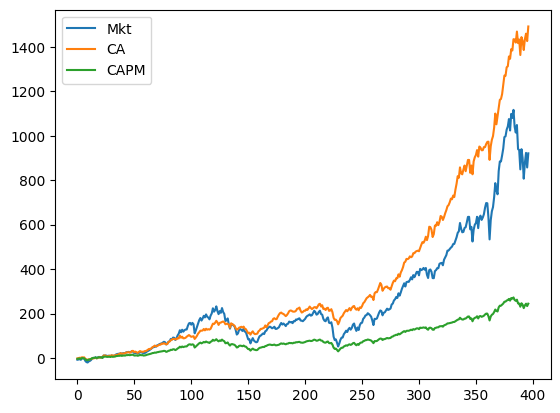

In [53]:
#plot cumulative returns, market cumulative returns, and CA cumulative returns
plt.plot(generate_cumulative_returns(ff_trim['Mkt-RF']), label='Mkt')
plt.plot(generate_cumulative_returns(sdf.CA), label='CA')
plt.plot(generate_cumulative_returns(returns - ff_trim.RF), label='CAPM')
plt.legend()

## (g)
This strategy seems to generate a good amount of alpha, so it would seem like a good strategy from that point of view. There could be some downside, though, as it seems to follow the market trends fairly closely and could lead to higher losses in a market downturn. 


# Problem 2

In [54]:
strats = pd.read_csv("data/ps1_strategies.csv")
strats

,date,CA,LBHA,LSA,TA,HV,LV,NA,LB,HB
0,199001,-1.771984,1.498262,-7.457500,1.679061,-7.271919,0.022091,-5.392944,-1.353457,-22.772632
1,199002,1.418966,3.642659,1.054500,0.205289,-0.986167,0.062055,-1.768405,-2.118514,5.151408
2,199003,1.375007,1.737180,1.738500,-1.572688,-0.018665,0.341639,-0.333926,1.452434,4.480134
3,199004,-0.395588,0.734520,-3.192000,2.474704,-3.294381,0.253568,-2.578905,2.123740,-10.101798
4,199005,2.588010,1.298923,7.999000,0.754379,8.038877,-0.113650,1.337511,-1.555230,26.259080
...,...,...,...,...,...,...,...,...,...,...
392,202209,-2.640759,0.341477,1.206628,-8.882500,-8.396274,0.138919,-8.208565,4.911723,-27.800254
393,202210,3.290022,2.849030,1.965639,7.438500,7.728801,0.099102,3.743379,2.064744,24.367165
394,202211,1.615024,0.474610,0.054055,4.370000,4.132530,0.025099,4.448278,0.730237,14.882494
395,202212,-2.144610,0.503661,1.172292,-6.089500,-3.276646,0.290945,-2.127425,-2.965015,-18.772379


In [67]:
def analyze_strategy(strat="CA", ff=pd.read_csv('data/F-F_Research_Data_Factors.csv')):
    '''
    strategy: dataframe with columns 'date' and 'CA'
    ff: dataframe with columns 'Month', 'Mkt-RF', and 'RF'
    '''
    # Trim ff to match strategy
    sdf = pd.read_csv('data/ps1_strategies.csv')
    strategy = sdf[strat]
    ff_trim = ff[ff['Month'] >= sdf['date'].min()]
    ff_trim = ff_trim[ff_trim['Month'] <= sdf['date'].max()] 
    ff_trim = ff_trim.reset_index(drop=True)
    
    # Calculate strategy returns
    avg_monthly = strategy.mean()
    volatility = strategy.std()
    sharpe_ratio = (strategy/volatility).mean()
    
    # Calculate CAPM
    beta, alpha = generate_capm(strategy.to_numpy(), (ff_trim['Mkt-RF'] + ff_trim['RF']).to_numpy(), ff_trim.RF.to_numpy())
    
    # Calculate cumulative returns
    returns = ff_trim.RF + beta*ff_trim['Mkt-RF']   

    plt.figure()
    plt.plot(generate_cumulative_returns(ff_trim['Mkt-RF']), label='Mkt')
    plt.plot(generate_cumulative_returns(strategy), label=strat)
    plt.plot(generate_cumulative_returns(returns - ff_trim.RF), label='CAPM for ' + strat + ' without alpha')
    plt.legend()
    
    print("------- For strategy " + strat + ": -------")
    print("The average monthly return of the strategy is ")
    print(avg_monthly)
    print("the volatility is")
    print(volatility)
    print("The average monthly Sharpe Ratio is")
    print(sharpe_ratio)
    print("The beta of the strategy is")
    print(beta)
    print("The alpha of the strategy is")
    print(alpha)
    print()
    
    return avg_monthly, volatility, sharpe_ratio, beta, alpha

------- For strategy LBHA: -------
The average monthly return of the strategy is 
0.4859464207520061
the volatility is
2.0856580324390097
The average monthly Sharpe Ratio is
0.23299429398007826
The beta of the strategy is
0.0058505927082015945
The alpha of the strategy is
0.4819245435328744

------- For strategy LBHA: -------
The average monthly return of the strategy is 
0.4859464207520061
the volatility is
2.0856580324390097
The average monthly Sharpe Ratio is
0.23299429398007826
The beta of the strategy is
0.0058505927082015945
The alpha of the strategy is
0.4819245435328744

------- For strategy LSA: -------
The average monthly return of the strategy is 
0.7486271836229957
the volatility is
3.1723253621783742
The average monthly Sharpe Ratio is
0.23598688600747053
The beta of the strategy is
0.3913904338565457
The alpha of the strategy is
0.47957337177465853

------- For strategy TA: -------
The average monthly return of the strategy is 
0.7527404182120594
the volatility is
3.45702

(0.46731498403049637,
 1.9267646547507409,
 0.24253869453036617,
 0.021084089526146273,
 0.4528211329660617)

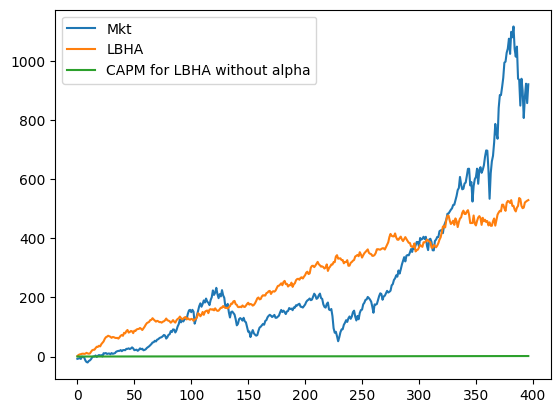

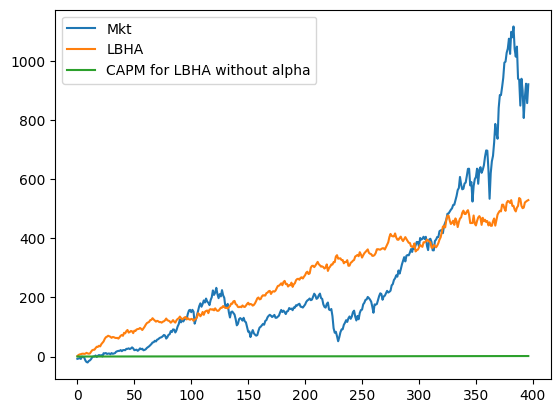

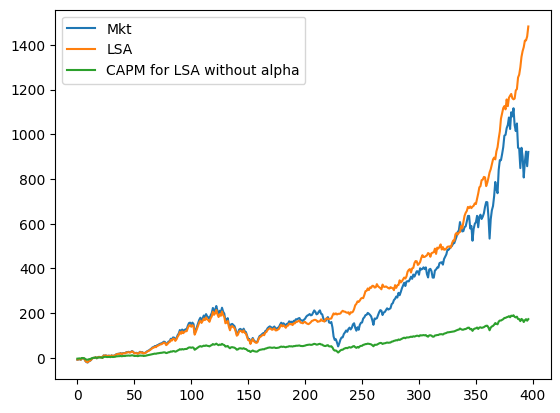

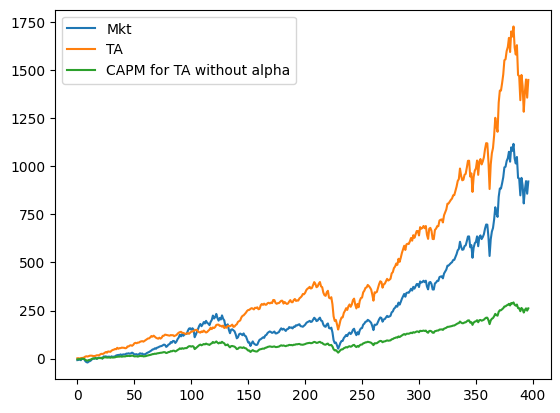

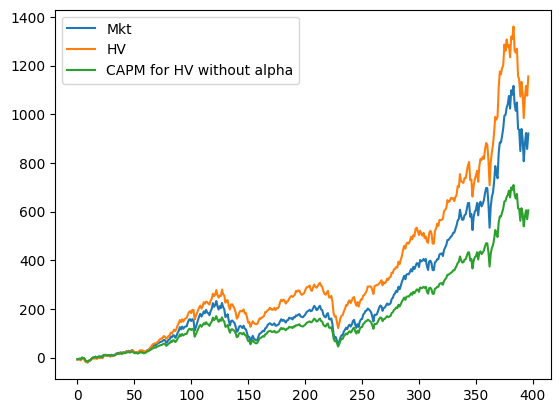

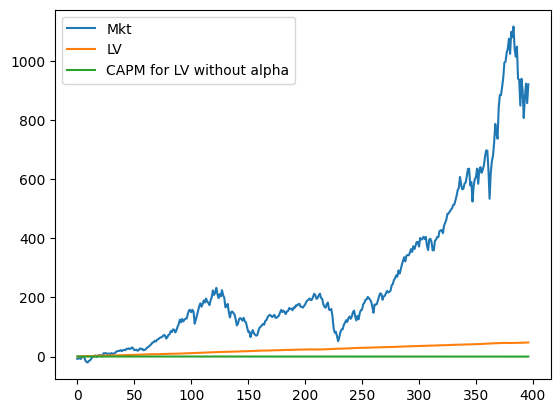

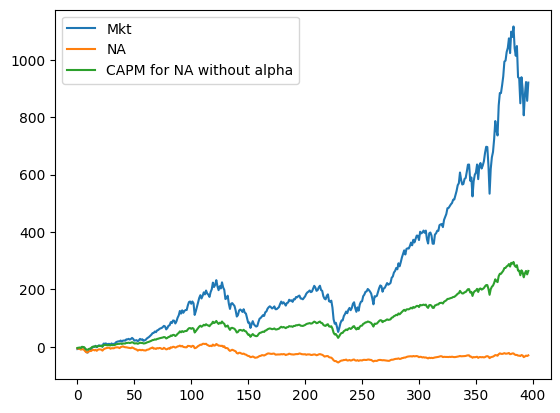

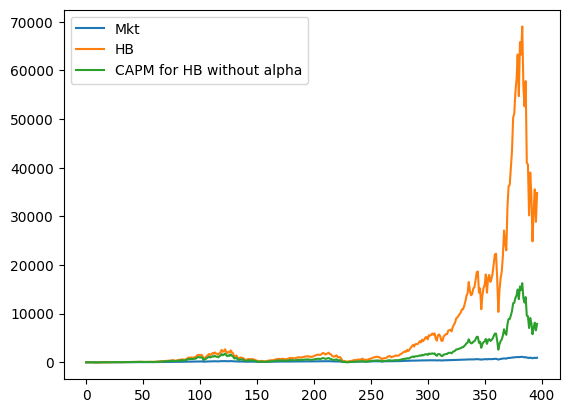

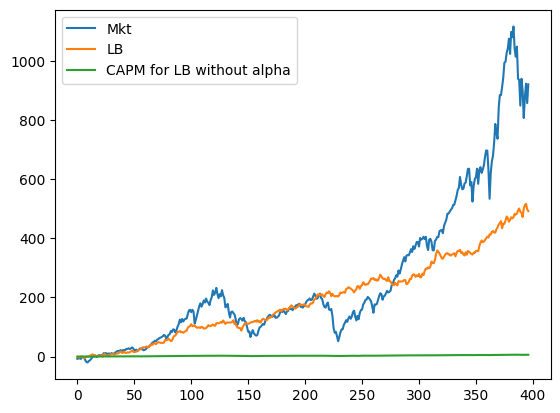

In [68]:
analyze_strategy("LBHA")
analyze_strategy("LBHA")
analyze_strategy("LSA")
analyze_strategy("TA")
analyze_strategy("HV")
analyze_strategy("LV")
analyze_strategy("NA")
analyze_strategy("HB")
analyze_strategy("LB")

## A.
LBHA seems to beat the market during market downturns, while it loses out when the market is doing exceptionally well.

## B.


Problem 3
note: confirm that by "cumulative" he really means "current" value

In [60]:
def fee_analysis2(strat="CA", ff=pd.read_csv('data/F-F_Research_Data_Factors.csv')):
    '''
    strategy: dataframe with columns 'date' and 'CA'
    ff: dataframe with columns 'Month', 'Mkt-RF', and 'RF'
    '''
    # Trim ff to match strategy
    sdf = pd.read_csv('data/ps1_strategies.csv')
    strategy = sdf[strat]
    ff_trim = ff[ff['Month'] >= sdf['date'].min()]
    ff_trim = ff_trim[ff_trim['Month'] <= sdf['date'].max()] 
    ff_trim = ff_trim.reset_index(drop=True)
    
    # Calculate strategy returns - FINISH
    curr_val = generate_cumulative_returns(strategy)
    #avg_monthly = strategy.diff().mean()
    #curr_val = [0] # FIX

    # Calculate before-fee alphas and betas (part a)
    beta_1, alpha_1 = generate_capm(curr_val.to_numpy(), (ff_trim['Mkt-RF'] + ff_trim['RF']).to_numpy(), ff_trim.RF.to_numpy())
# Calculate maximum return at each time point
   
     max_val = [curr_val[0]]
    for i in range(1,len(curr_val)):
        max_v = max(max_val[i-1], curr_val[i])
        max_val.append(max_v)

    # Calculate fees at each time point
    management_fee = 0.15 * curr_val
    incentive_fee = 0.2 * np.maximum(0, np.array(curr_val) - np.array(max_val))

    # calculate after-fees alpha and betas (part b)
    after_strategy = curr_val - management_fee - incentive_fee

    # Calculate CAPM
    beta_2, alpha_2 = generate_capm(after_strategy.to_numpy(), (ff_trim['Mkt-RF'] + ff_trim['RF']).to_numpy(), ff_trim.RF.to_numpy())
    
    return alpha_1, beta_1, alpha_2, beta_2, np.array(management_fee) + np.array(incentive_fee)
    
    # Calculate cumulative returns
    # returns = ff_trim.RF + beta*ff_trim['Mkt-RF']
    # plt.plot(generate_cumulative_returns(ff_trim['Mkt-RF']), label='Mkt')
    # plt.plot(generate_cumulative_returns(strategy), label=strat)
    # plt.plot(generate_cumulative_returns(returns - ff_trim.RF), label='CAPM for ' + strat + ' without alpha')
    # plt.legend()

    # print("The average monthly return of the strategy is ")
    # print(avg_monthly)
    # print("the volatility is")
    # print(volatility)
    # print("The average monthly Sharpe Ratio is")
    # print(sharpe_ratio)
    
    # print("The beta of the strategy is")
    # print(beta)
    # print("The alpha of the strategy is")
    # print(alpha)
    

    
def generate_capm(rpmrf, rm=ff['Mkt-RF']+ff.RF, rf=ff.RF):
    '''
    rp: excess return of the portfolio
    rm: excess return of the market
    rf: risk free rate
    '''
    beta = np.cov((rpmrf+rf), rm)[0, 1]/np.var(rm)
    alpha = np.mean(rpmrf) - beta*np.mean(rm - rf)
    return beta, alpha

IndentationError: unexpected indent (884902747.py, line 22)

In [63]:
def total_analysis(strats=["LB", "HB"], ff=pd.read_csv('data/F-F_Research_Data_Factors.csv')):
    # bf = before fee
    # af = after fee

    bf_alpha = []
    bf_beta = []
    af_alpha = []
    af_beta = []
    tot_fees = []
    for strat in strats:
        alpha_1, beta_1, alpha_2, beta_2, tot_fee = fee_analysis2(strat=strat, ff=ff)
        bf_alpha.append(alpha_1)
        bf_beta.append(beta_1)
        af_alpha.append(alpha_2)
        af_beta.append(beta_2)
        tot_fees.append(sum(tot_fee * 1e8))
        #tot_fees.append(tot_fee)
    
    hund_mill_fee = np.array(tot_fees)
    #hund_mill_fee = np.array(tot_fees) * 1e8
    print(hund_mill_fee.shape)
    higher_fee = np.argmax(hund_mill_fee)
    
    print("Part a \n----------------")
    for i in range(len(strats)):
        print(
        """strategy: {s}
        before-fee alpha: {a}
        before-fee beta: {b}""".format(s=strats[i], a=bf_alpha[i], b=bf_beta[i]))
    
    print("\nPart b \n----------------")
    for i in range(len(strats)):
        print("""strategy: {s}
        after-fee alpha: {a}
        after-fee beta: {b}""".format(s=strats[i], a=af_alpha[i], b=af_beta[i]))

    print("\nPart c \n----------------")
    print("Strategy {s} has higher fees after a $100 million investment.".format(s=strats[higher_fee]))
    # Explanation for HB = higher fees: 
    print("""The HB strategy has greater volatility since it is more closely correlated to the market valuation. 
        Thus, the HB strategy is capable of growing at a faster rate than the LB strategy. Since the fees are based
        on the size of the fund, a faster-growing fund (HB) will accrue higher fees at a faster rate.""")

    print("\nPart d \n----------------")
    print("""As a hedge fund manager, I would choose {high} since it results in higher fees (which I gain)
    As a client, I would choose {low} since it results in lower fees (which are a cost to me)""".format(
        high=strats[higher_fee], low=strats[1-higher_fee]))


In [64]:
total_analysis()

(2,)
1
Part a 
----------------
strategy: LB
        before-fee alpha: 192.09726193524463
        before-fee beta: -0.1085723409000571
strategy: HB
        before-fee alpha: 5885.074138284769
        before-fee beta: 88.65906128071212

Part b 
----------------
strategy: LB
        after-fee alpha: 163.28271412104837
        after-fee beta: -0.09234682470292856
strategy: HB
        after-fee alpha: 5002.313059018145
        after-fee beta: 75.3601417536674

Part c 
----------------
Strategy HB has higher fees after a $100 million investment.

Part d 
----------------
As a hedge fund manager, I would choose HB since it results in higher fees (which I gain)
    As a client, I would choose LB since it results in lower fees (which are a cost to me)
